# Uso de Requests para Obtención de Datos del Medio Ambiente de Madrid 

In [1]:
# Importamos biblioteca requets
import requests

In [2]:
# Hacemos la conexión con la página web por medio de requets
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
resp = requests.get(url)
print(resp.status_code)

200


In [3]:
# Descargamos el contenido de la página web
# Generamos ruta del archivo donde se encontrará el contenido
path = 'C:/Users/USUARIO DELL/Documents/Python Scripts/ANALISIS_DATOS/WEB_SCRAPPING/'
with open(path + 'horario.txt', 'wb') as output:
    # Escribimos el contenido dentro del archivo
    output.write(resp.content)

In [4]:
# Importamos las librerías necesarias para trabajar con los datos
import matplotlib.pyplot as plt
import csv

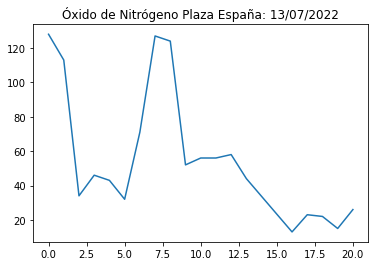

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20]
[128, 113, 34, 46, 43, 32, 71, 127, 124, 52, 56, 56, 58, 44, 13, 23, 22, 15, 26]


In [5]:
vs = []
horas = []
# Abrimos el archivo como un archivo csv
with open(path + 'horario.txt') as csvfile:
    # Creamos el reader
    readCSV = csv.reader(csvfile, delimiter = ",")
    # Leemos cada línea
    for row in readCSV:
        # Filtramos los registros
        if(row[0] + row[1] + row[2] == '28079004' and row[3] == '12'):
            hora = 0
            desp = 9
            # Agregamos los datos
            while hora <= 23:
                if row[desp + 2 * hora + 1] == 'V':
                    vs.append(int(row[desp + 2 * hora]))
                    horas.append(hora)
                hora += 1
                
# Imprimos la gráfica
plt.title("Óxido de Nitrógeno Plaza España: " + row[8] + "/" + row[7] + "/" + row[6])
plt.plot(horas, vs)
plt.show()
print(horas)
print(vs)

## Procesamiento Perezoso
Buscamos obtener los mismos resultados pero sin tener que descargar el contenido en un fichero

In [6]:
# Importamos las librerías necesarias
import requests
from contextlib import closing
import csv
import codecs
import matplotlib.pyplot as plt

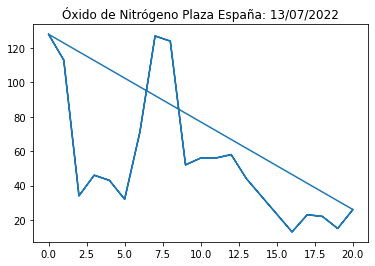

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20]
[128, 113, 34, 46, 43, 32, 71, 127, 124, 52, 56, 56, 58, 44, 13, 23, 22, 15, 26, 128, 113, 34, 46, 43, 32, 71, 127, 124, 52, 56, 56, 58, 44, 13, 23, 22, 15, 26]


In [7]:
with closing(requests.get(url, stream = True)) as r:
    reader = csv.reader(codecs.iterdecode(r.iter_lines(), 'utf-8'), delimiter=',')
    for row in reader:
        if(row[0] + row[1] + row[2] == '28079004' and row[3] == '12'):
            hora = 0
            desp = 9
            while hora <= 23:
                if row[desp + 2 * hora + 1] == 'V':
                    vs.append(int(row[desp + 2 * hora]))
                    horas.append(hora)
                hora += 1
plt.title("Óxido de Nitrógeno Plaza España: " + row[8] + "/" + row[7] + "/" + row[6])
plt.plot(horas, vs)
plt.show()
print(horas)
print(vs)